# HW6_1

## Group: Dongjie Fan, Ziman Zhou


In [1]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import json
import urllib2
import geopandas as gpd
from pandas.tools.plotting import scatter_matrix
import sklearn
import statsmodels.formula.api as smf
import scipy
%pylab inline

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv("PUIDATA")

'/home/cusp/df1676/PUIdata'

In [3]:
def getEnergy(api, json_file):
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + json_file):
        response = urllib2.urlopen(api)
        data = response.read().decode("utf-8")
        data = json.loads(data)
        with open(json_file,'w') as file:
            json.dump(data, file, indent = 4)

In [4]:
EnergyJSON = os.getenv("PUIDATA")+'/Energy.json'
API = "https://data.cityofnewyork.us/resource/m46j-75iy.json"
#csv = "https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD"
#os.system("wget "+csv)
#os.system("mv"+blablabla)
getEnergy(API, EnergyJSON)

In [5]:
nrg = pd.read_json(EnergyJSON)

In [6]:
print (nrg.columns)
nrg.head(3)
#df = df.sort_values(by='record_number')

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')


,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,N/A,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,#N/A,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,N/A,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [7]:
def getMAPPLUTO(link, name):
    zip_name = name + ".zip"
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + zip_name):
        os.system("wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mappluto_16v1.zip")
        os.system("mv " + zip_name + " " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/" + zip_name + " -d "+ os.getenv("PUIDATA") + "/" + name)

In [8]:
MAPPLUTO_link = "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mappluto_16v1.zip"
MAPPLUTO_name = "mappluto_16v1"
#MAPPLUTO_zip_name = MAPPLUTO_name + ".zip"
getMAPPLUTO(MAPPLUTO_link, MAPPLUTO_name)

In [9]:
bsize = gpd.read_file(os.getenv("PUIDATA") + '/' + MAPPLUTO_name +'/Manhattan/MNMapPLUTO.shp')

In [10]:
print (bsize.columns.values)
#bsize.head(3)

[u'APPBBL' u'APPDate' u'Address' u'AllZoning1' u'AllZoning2' u'AreaSource'
 u'AssessLand' u'AssessTot' u'BBL' u'BldgArea' u'BldgClass' u'BldgDepth'
 u'BldgFront' u'Block' u'BoroCode' u'Borough' u'BsmtCode' u'BuiltCode'
 u'BuiltFAR' u'CB2010' u'CD' u'CT2010' u'ComArea' u'CommFAR' u'CondoNo'
 u'Council' u'EDesigNum' u'Easements' u'ExemptLand' u'ExemptTot' u'Ext'
 u'FacilFAR' u'FactryArea' u'FireComp' u'GarageArea' u'HealthArea'
 u'HistDist' u'IrrLotCode' u'LandUse' u'Landmark' u'Lot' u'LotArea'
 u'LotDepth' u'LotFront' u'LotType' u'LtdHeight' u'MAPPLUTO_F' u'NumBldgs'
 u'NumFloors' u'OfficeArea' u'OtherArea' u'Overlay1' u'Overlay2'
 u'OwnerName' u'OwnerType' u'PLUTOMapID' u'PolicePrct' u'ProxCode'
 u'ResArea' u'ResidFAR' u'RetailArea' u'SHAPE_Area' u'SHAPE_Leng'
 u'SPDist1' u'SPDist2' u'Sanborn' u'SanitBoro' u'SanitDist' u'SanitSub'
 u'SchoolDist' u'SplitZone' u'StrgeArea' u'TaxMap' u'Tract2010' u'UnitsRes'
 u'UnitsTotal' u'Version' u'XCoord' u'YCoord' u'YearAlter1' u'YearAlter2'
 u'Year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f567c638c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f567d3f2bd0>]], dtype=object)

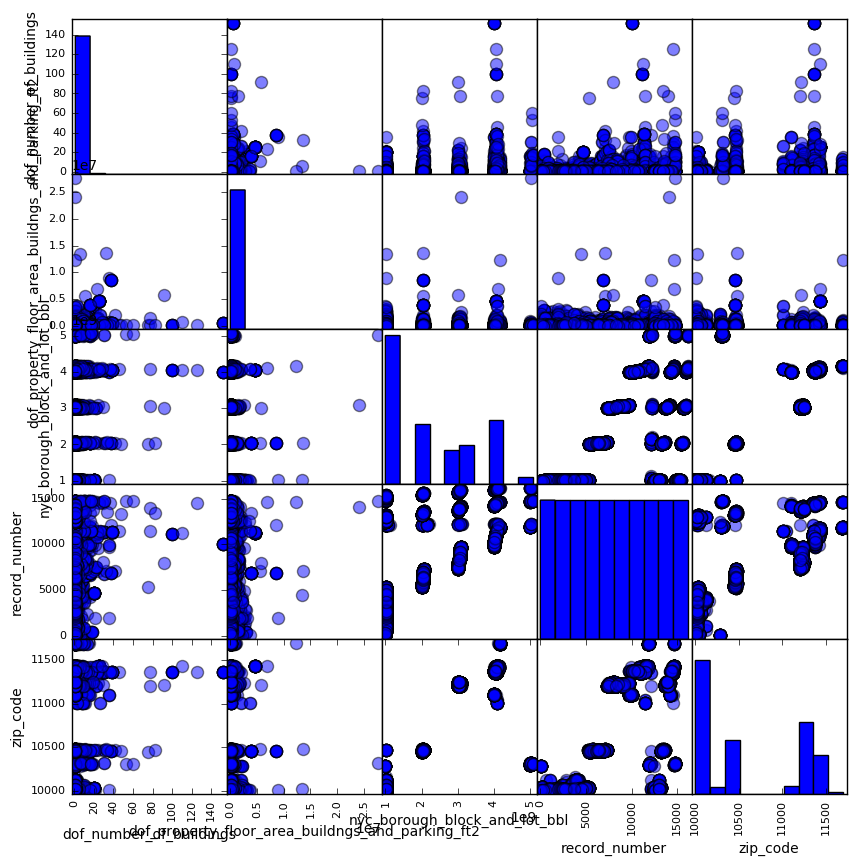

In [11]:
#try make a scatter plot of nrg. Few columns will plot
scatter_matrix (nrg, s=300, figsize=(10, 10))

Figure 1: scatter matrix of all numerical values in the files.

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them.
Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..."
However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [12]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False


Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest. 

I can replace the entries that failed to be converted to 'NaN'
(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx) 

#### Define a vectorized function which takes a nested sequence of objects or numpy arrays as inputs and returns anumpy array as output. The vectorized function evaluates `pyfunc` over successive tuples of the input arrays like the python map function, except it uses the broadcasting rules of numpy.


#### 'site_eui_kbtu_ft2' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. 

In [13]:
nrg_interest_cols = ['site_eui_kbtu_ft2', 'reported_property_floor_area_building_s_ft']

for col in nrg_interest_cols:
    index = (np.vectorize(canconvert)(nrg[col]))
    print (col, "\n# of List ={}".format(len(index)))
    print ("# of TRUE = {}\n# of FALSE = {}".format((index == True).sum(),(index == False).sum()))
    print ("# invalid entries changed to NaN {}\n\n".format((~index).sum()))
    nrg[col][~index] = float('NaN')

site_eui_kbtu_ft2 
# of List =16170
# of TRUE = 15513
# of FALSE = 657
# invalid entries changed to NaN 657




/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


reported_property_floor_area_building_s_ft 
# of List =16170
# of TRUE = 13045
# of FALSE = 3125
# invalid entries changed to NaN 3125




In [14]:
(np.vectorize(canconvert)(nrg['site_eui_kbtu_ft2']) == False).sum()

0

In [15]:
##check that your conversion worked: e.g.
#print (nrg['site_eui_kbtu_ft2'].astype(float))
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
#bsize.BBL.astype(float)
#this should not return an error
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!


# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [16]:
nrg.head(2)

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,N/A,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0


In [17]:
bsize.head(2)

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."


#### change col's name

In [18]:
nrg.rename(index=str, columns={"nyc_borough_block_and_lot_bbl": "BBL"}, inplace=True)

In [19]:
#merge
bblnrgdata = nrg.merge(bsize, how='inner', left_on='BBL', right_on='BBL')

In [20]:
#print (bblnrgdata.columns)
#bblnrgdata.head(2)

In [21]:
# Now the scatter matrix plot should show more columns.
#scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

#####  s=30?

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

In [22]:
# energy_total = []
# for i in xrange(bblnrgdata.shape[0]):
#     #print (i)
#     #print (type(bblnrgdata.site_eui_kbtu_ft2[i]), type(bblnrgdata.reported_property_floor_area_building_s_ft[i]))
#     energy_total.append(bblnrgdata.site_eui_kbtu_ft2[i] * bblnrgdata.reported_property_floor_area_building_s_ft[i])
# energy_total[:10]
    

In [23]:
bblnrgdata[['site_eui_kbtu_ft2', 'reported_property_floor_area_building_s_ft']] = \
    bblnrgdata[['site_eui_kbtu_ft2', 'reported_property_floor_area_building_s_ft']].apply(pd.to_numeric)

In [24]:
bblnrgdata['energy_total'] = bblnrgdata['site_eui_kbtu_ft2'] * bblnrgdata['reported_property_floor_area_building_s_ft']

In [25]:
#bblnrgdata['energy_total'].head(10)

### Use 'all units'

In [26]:
type(bblnrgdata['UnitsTotal'][0])

numpy.int64

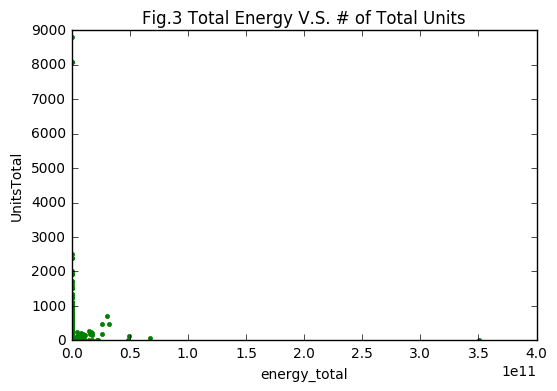

In [27]:
#u'UnitsTotal'
#u'site_eui_kbtu_ft2'
#u'reported_property_floor_area_building_s_ft'
pl.plot(bblnrgdata.energy_total, bblnrgdata.UnitsTotal, 'g.')
pl.title('Fig.3 Total Energy V.S. # of Total Units')
pl.xlabel('energy_total')
pl.ylabel('UnitsTotal')

### Fig.3 shows the relationship between Energy in Total (Energy per Square Feet * Floor Area of the Building) and the Number of Units (All Kinds). 

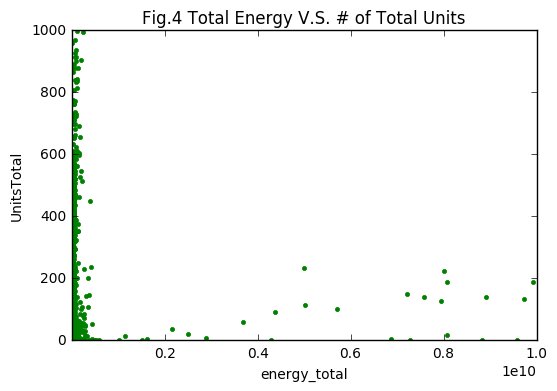

In [28]:
pl.plot(bblnrgdata.energy_total, bblnrgdata.UnitsTotal, 'g.')
pl.title('Fig.4 Total Energy V.S. # of Total Units')
pl.xlim(1000,1e10)
pl.ylim(0,1000)
pl.xlabel('energy_total')
pl.ylabel('UnitsTotal')

### Fig.4 : Zoom in Fig.3, which shows the relationship between Energy in Total (Energy per Square Feet * Floor Area of the Building) and the Number of Units (All Kinds). 

In [29]:
#print(bblnrgdata.energy_total.shape[0], '->',bblnrgdata[bblnrgdata.energy_total>10000].shape[0])
#print(bblnrgdata_cut.UnitsTotal.shape[0], '->',bblnrgdata_cut[bblnrgdata_cut.UnitsTotal<1000 and bblnrgdata_cut>0].shape[0])

# cut dataframe
bblnrgdata_cut = bblnrgdata[bblnrgdata.energy_total>10000]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal<1000]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal>0]

In [30]:
bblnrgdata_cut[['UnitsTotal','energy_total']].sort_values(by='UnitsTotal',axis=0).head(2)

,UnitsTotal,energy_total
5801,1,220872995.2
4892,1,46694300.0


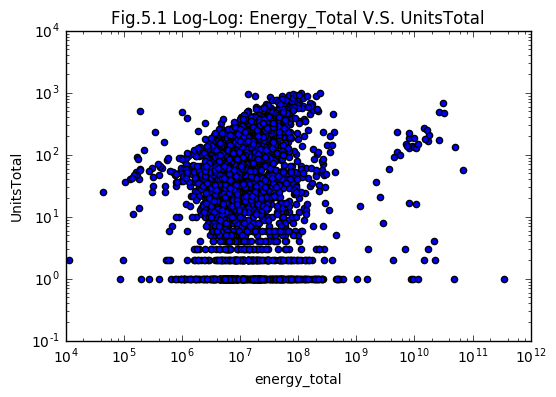

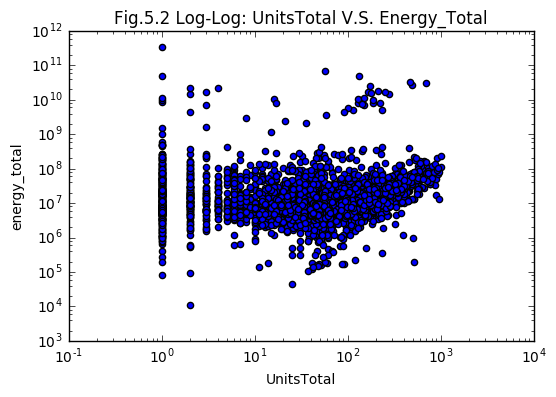

In [31]:
bblnrgdata_cut.plot(x='energy_total', y='UnitsTotal', loglog=True, kind='scatter', 
                     title="Fig.5.1 Log-Log: Energy_Total V.S. UnitsTotal")
bblnrgdata_cut.plot(y='energy_total', x='UnitsTotal', loglog=True, kind='scatter', 
                     title="Fig.5.2 Log-Log: UnitsTotal V.S. Energy_Total")

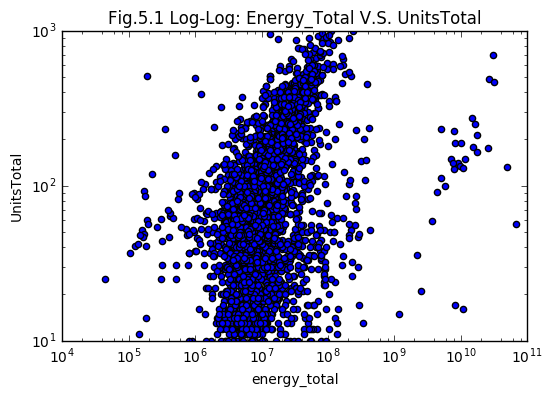

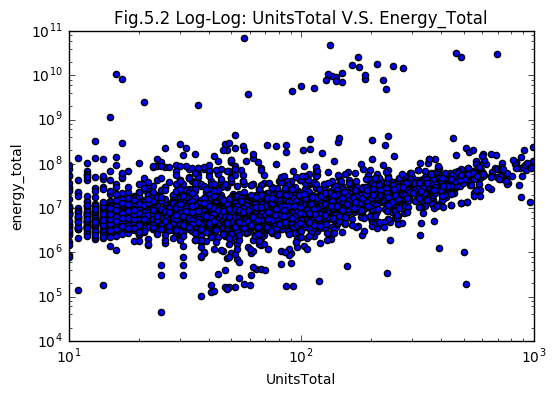

In [32]:
#log plot
bblnrgdata_cut.plot(x='energy_total', y='UnitsTotal', loglog=True, kind='scatter', 
                    xlim=(1e4, 1e11), ylim=(1e1, 1e3), title="Fig.5.1 Log-Log: Energy_Total V.S. UnitsTotal")
bblnrgdata_cut.plot(y='energy_total', x='UnitsTotal', loglog=True, kind='scatter', 
                    ylim=(1e4, 1e11), xlim=(1e1, 1e3), title="Fig.5.2 Log-Log: UnitsTotal V.S. Energy_Total")

### Fig.5 shows the relationship with log(Energy_Total) and log(UnitsTotal)

## bblnrgdata_cut_2
## !!!! energy_total (1e4, 1e11)
## !!!! UnitsTotal(1e1,1e3)

In [33]:
bblnrgdata_cut['log_energy_total']=np.log10(bblnrgdata_cut.energy_total)

In [34]:
bblnrgdata_cut['log_UnitsTotal']=np.log10(bblnrgdata_cut.UnitsTotal)

In [35]:
bblnrgdata_cut_2 = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal>1e1]
bblnrgdata_cut_2 = bblnrgdata_cut_2[bblnrgdata_cut_2.UnitsTotal<1e3]

bblnrgdata_cut_2 = bblnrgdata_cut_2[bblnrgdata_cut_2.energy_total>1e4]
bblnrgdata_cut_2 = bblnrgdata_cut_2[bblnrgdata_cut_2.energy_total<1e11]

In [36]:
import statsmodels.formula.api as smf

In [37]:
lm1 = smf.ols(formula="log_energy_total ~ log_UnitsTotal", data=bblnrgdata_cut_2).fit()

In [38]:
lm1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.167    
Dependent Variable: log_energy_total AIC:                5019.0979
Date:               2016-10-16 15:12 BIC:                5031.8007
No. Observations:   4236             Log-Likelihood:     -2507.5  
Df Model:           1                F-statistic:        850.0    
Df Residuals:       4234             Prob (F-statistic): 1.84e-170
R-squared:          0.167            Scale:              0.19138  
-------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept        6.0860    0.0331  183.6928  0.0000  6.0211  6.1510
log_UnitsTotal   0.5002    0.0172   29.1553  0.0000  0.4666  0.5339
------------------------------------------------------------------
Omnibus:            2348.119      Durbin-Watson:         1.685    
Prob(Omnibus):      0.000         Jarque-Bera (JB):      45795.652
Skew:               2.225         Prob(JB):              0.000    
Kurtosis:           18.481        Condition No.:         12       
==================================================================

"""

In [39]:
lm2 = smf.ols(formula="log_UnitsTotal ~ log_energy_total", data=bblnrgdata_cut_2).fit()

In [40]:
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.167    
Dependent Variable: log_UnitsTotal   AIC:                3310.7468
Date:               2016-10-16 15:13 BIC:                3323.4495
No. Observations:   4236             Log-Likelihood:     -1653.4  
Df Model:           1                F-statistic:        850.0    
Df Residuals:       4234             Prob (F-statistic): 1.84e-170
R-squared:          0.167            Scale:              0.12787  
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          -0.4594   0.0808 -5.6862 0.0000 -0.6178 -0.3010
log_energy_total    0.3342   0.0115 29.1553 0.0000  0.3118  0.3567
------------------------------------------------------------------
Omnibus:             134.304       Durbin-Watson:          1.371  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       147.440
Skew:                -0.436        Prob(JB):               0.000  
Kurtosis:            3.273         Condition No.:          106    
==================================================================

"""

In [41]:
from sklearn import linear_model
mod1 = linear_model.LinearRegression(fit_intercept=True)
mod1.fit(X=np.log10(bblnrgdata_cut_2.UnitsTotal).reshape(bblnrgdata_cut_2.UnitsTotal.shape[0],1), 
        y=np.log10(bblnrgdata_cut_2.energy_total))
mod2 = linear_model.LinearRegression(fit_intercept=True)
mod2.fit(y=np.log10(bblnrgdata_cut_2.UnitsTotal), 
        X=np.log10(bblnrgdata_cut_2.energy_total).reshape(bblnrgdata_cut_2.energy_total.shape[0],1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
for mod in [mod1, mod2]:
    print ("slope= {}, intercept= {}".format(mod.coef_, mod.intercept_))

slope= [ 0.50024982], intercept= 6.08603573635
slope= [ 0.3342249], intercept= -0.459438131431


In [43]:
##Other Package

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $$\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



### 1.Fit a line to Units vs Energy.

In [44]:
print ("slope = {}, intercept = {}".format(lm1.params[1], lm1.params[0]))

slope = 0.500249815698, intercept = 6.08603573635


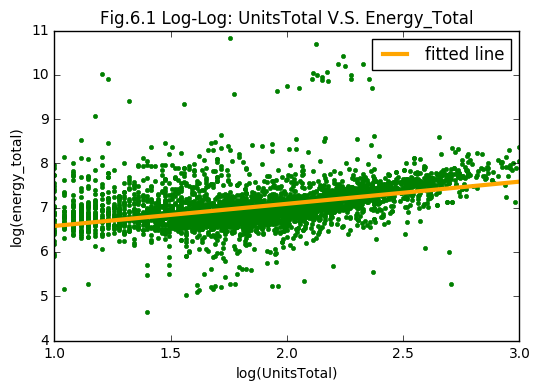

In [45]:
#fig = pl.figure(figsize=(5,5))
#ax1 = fig.add_subplot(111)
pl.plot(np.log10(bblnrgdata_cut['UnitsTotal']), np.log10(bblnrgdata_cut['energy_total']), 'g.',label="") 
pl.ylim(4,11) 
pl.xlim(1,3)
pl.title("Fig.6.1 Log-Log: UnitsTotal V.S. Energy_Total")
pl.plot([1,3], list(np.array([1,3])*lm1.params[1] + lm1.params[0]), c='orange', linewidth=3,label="fitted line")
pl.xlabel("log(UnitsTotal)")
pl.ylabel("log(energy_total)")
pl.legend()

### Fig. 6.1 shows the Log-Log plot : UnitsTotal V.S. Energy_Total, and Fitted Line.

### 2.Fit a line to Energy vs Units.

In [46]:
print ("slope = {}, intercept = {}".format(lm2.params[1], lm2.params[0]))

slope = 0.334224903879, intercept = -0.459438131431


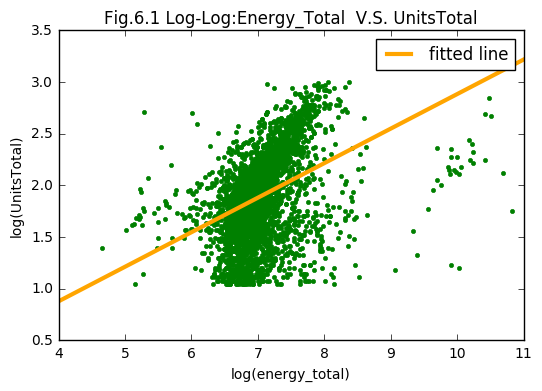

In [47]:
pl.plot(np.log10(bblnrgdata_cut_2['energy_total']),np.log10(bblnrgdata_cut_2['UnitsTotal']), 'g.', label="") 
#pl.xlim(4,11) 
#pl.ylim(1,3)
pl.title("Fig.6.1 Log-Log:Energy_Total  V.S. UnitsTotal")
pl.plot([4,11], list(np.array([4,11])*lm2.params[1] + lm2.params[0]), c='orange', linewidth=3, label="fitted line")
pl.ylabel("log(UnitsTotal)")
pl.xlabel("log(energy_total)")
pl.legend()

### Fig. 6.2 shows the Log-Log plot : Energy_Total V.S. UnitsTotal, and Fitted Line.

### 3. Evaluate which is better by calculating the chi square.

In [48]:
np.log(10)

2.3025850929940459

In [49]:
e = np.sqrt(bblnrgdata_cut_2['energy_total'])/(np.log(10)*bblnrgdata_cut_2['energy_total'])

In [50]:
#E = lm1.predict()


chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$?

In [51]:
sum(((lm1.predict()-bblnrgdata_cut_2['log_energy_total'])**2)/e)

78618207.764163941

In [52]:
sum(((lm2.predict()-bblnrgdata_cut_2['log_energy_total'])**2)/e)

1379114901.5795503

### ? the chi-square random variable is defined by Χ2 = Σ [ (Oi - Ei)2 / Ei ]

In [53]:
#sum(((lm1.predict()-bblnrgdata_cut_2['log_energy_total'])**2)/E)

In [54]:
#sum(((lm2.predict()-bblnrgdata_cut_2['log_energy_total'])**2)/E)

### The model with 'log_energy_total' as Dependent Var and 'log_UnitsTotal' as Independent Var is better since it has lower chi-square value.

<br/>
## 4.Fit a 2nd degree polynomial

In [55]:
bblnrgdata_cut_2['log_UnitsTotal_sq']=bblnrgdata_cut_2['log_UnitsTotal']**2

In [56]:
lmPoly = smf.ols(formula="log_energy_total ~ log_UnitsTotal + log_UnitsTotal_sq", data=bblnrgdata_cut_2).fit()

In [57]:
lmPoly.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.227    
Dependent Variable: log_energy_total AIC:                4701.9323
Date:               2016-10-16 15:13 BIC:                4720.9864
No. Observations:   4236             Log-Likelihood:     -2348.0  
Df Model:           2                F-statistic:        623.8    
Df Residuals:       4233             Prob (F-statistic): 3.73e-238
R-squared:          0.228            Scale:              0.17753  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          8.1307   0.1168  69.6204 0.0000  7.9018  8.3597
log_UnitsTotal    -1.7276   0.1235 -13.9869 0.0000 -1.9698 -1.4855
log_UnitsTotal_sq  0.5814   0.0319  18.2006 0.0000  0.5188  0.6440
------------------------------------------------------------------
Omnibus:            2501.238      Durbin-Watson:         1.737    
Prob(Omnibus):      0.000         Jarque-Bera (JB):      59719.775
Skew:               2.361         Prob(JB):              0.000    
Kurtosis:           20.778        Condition No.:         121      
==================================================================

"""

In [58]:
lmPoly.params

Intercept            8.130742
log_UnitsTotal      -1.727610
log_UnitsTotal_sq    0.581381
dtype: float64

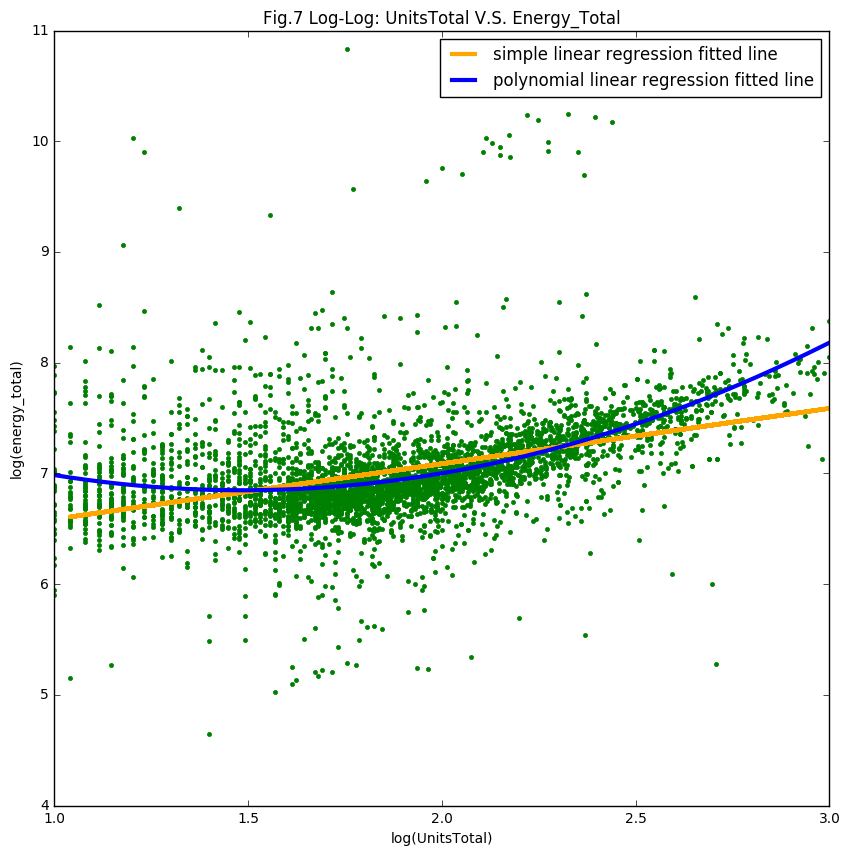

In [59]:
fig = pl.figure(figsize=(10,10))
#ax1 = fig.add_subplot(111)
pl.plot(np.log10(bblnrgdata_cut['UnitsTotal']), np.log10(bblnrgdata_cut['energy_total']), 'g.',label="") 
pl.ylim(4,11) 
pl.xlim(1,3)
pl.title("Fig.7 Log-Log: UnitsTotal V.S. Energy_Total")
pl.plot(bblnrgdata_cut_2.log_UnitsTotal, lm1.predict(), c='orange', 
        linewidth=3,label="simple linear regression fitted line")
pl.plot(np.linspace(1,3,1000), 0.581381*(np.linspace(1,3,1000)**2) \
        +(-1.727610)*np.linspace(1,3,1000) +8.130742, linewidth=3, label="polynomial linear regression fitted line")

pl.xlabel("log(UnitsTotal)")
pl.ylabel("log(energy_total)")
pl.legend()

### Fig.7 shows the Log-Log: UnitsTotal V.S. Energy_Total and fitted line for simple linear regression and polynomial regression

<br/>
### 5.Likelihood ratio test.

In [60]:
lr_stat, p_value, df_diff = lmPoly.compare_lr_test(lm1)

In [61]:
p_value

2.20116251021861e-71

In [62]:
df_diff

1.0

In [63]:
p_value<0.004

True

### since p_value < 0.004, we reject null hypothesis, which means we choose the polynomial regression model.

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

### Simple Test for y=log10(x), x~poisson, std(yi)=...

In [64]:
a=np.random.poisson(lam=9,size=10)
b=np.log10(a)
print(mean(a),mean(b))
print (mean(sqrt((a))/(np.log(10)*a)), std(b))

8.9 0.933354947786
0.150012257324 0.127118470893


In [65]:
lm1.params

Intercept         6.086036
log_UnitsTotal    0.500250
dtype: float64

In [66]:
def getResidual_1(X, Y, slope, intercept, X_original):
    return sum(((Y - (X*slope+intercept))**2))

In [67]:
nx, ny = (100,100)
xx = np.linspace(-5, 5, nx, endpoint=True)
yy = np.linspace(1, 11, ny, endpoint=True)
xv, yv = np.meshgrid(xx, yy)

Lsurface1 = np.zeros((len(xx), len(yy))) 
Lsurface2 = np.zeros((len(xx), len(yy))) 

In [68]:
for x in xrange(Lsurface1.shape[0]):
    for y in xrange(Lsurface1.shape[1]):
        Lsurface1[x][y] = getResidual_1(bblnrgdata_cut_2.log_UnitsTotal, bblnrgdata_cut_2.log_energy_total,
                                        xv[x][y],yv[x][y], bblnrgdata_cut_2.UnitsTotal)

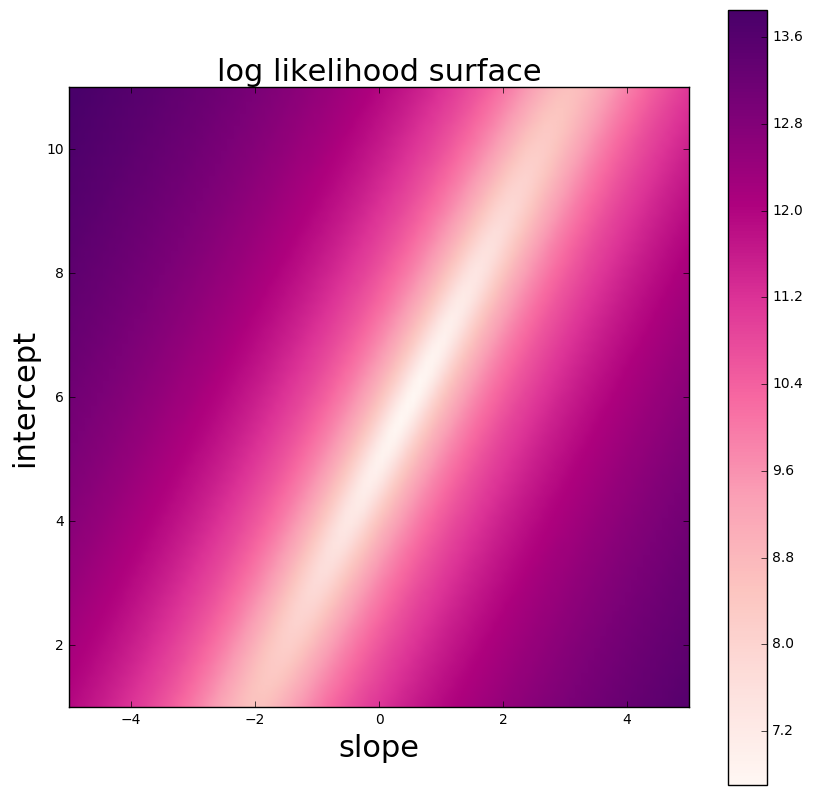

In [69]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface1), extent = [-5,5,1,11], aspect=None, cmap='RdPu')
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()


### Plot above shows the likelihood surface. It's obvious that when slope around 0, and intercept around 6, we could get the lowest RSS, which ,matches the result of lm1 we built in last section.

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

## My Plot As Follow:

In [70]:
energyZipSum = bblnrgdata_cut_2['energy_total'].groupby(bblnrgdata_cut_2.ZipCode).agg(sum)
UnitsTotalZipSum = bblnrgdata_cut_2['UnitsTotal'].groupby(bblnrgdata_cut_2.ZipCode).agg(sum)
numZip = bblnrgdata_cut_2['ZipCode'].groupby(bblnrgdata_cut_2.ZipCode).agg([count_nonzero])
# print(numZip.shape)
EnergyUnitZip = energyZipSum / UnitsTotalZipSum
# EnergyUnitZip.head()
# EnergyUnitZip = (EnergyUnitZip-min(EnergyUnitZip))/(max(EnergyUnitZip)-min(EnergyUnitZip))
LotZipMean = bblnrgdata_cut_2['LotArea'].groupby(bblnrgdata_cut_2.ZipCode).agg(mean)
YearZipMean = bblnrgdata_cut_2['YearBuilt'].groupby(bblnrgdata_cut_2.ZipCode).agg(sum)
Year = 2016 - YearZipMean.values /numZip.values.flatten()
Year = (Year-min(Year))/(max(Year)-min(Year))
#Year

In [71]:
print (mean(Year), std(Year))

0.589018878218 0.206392686261


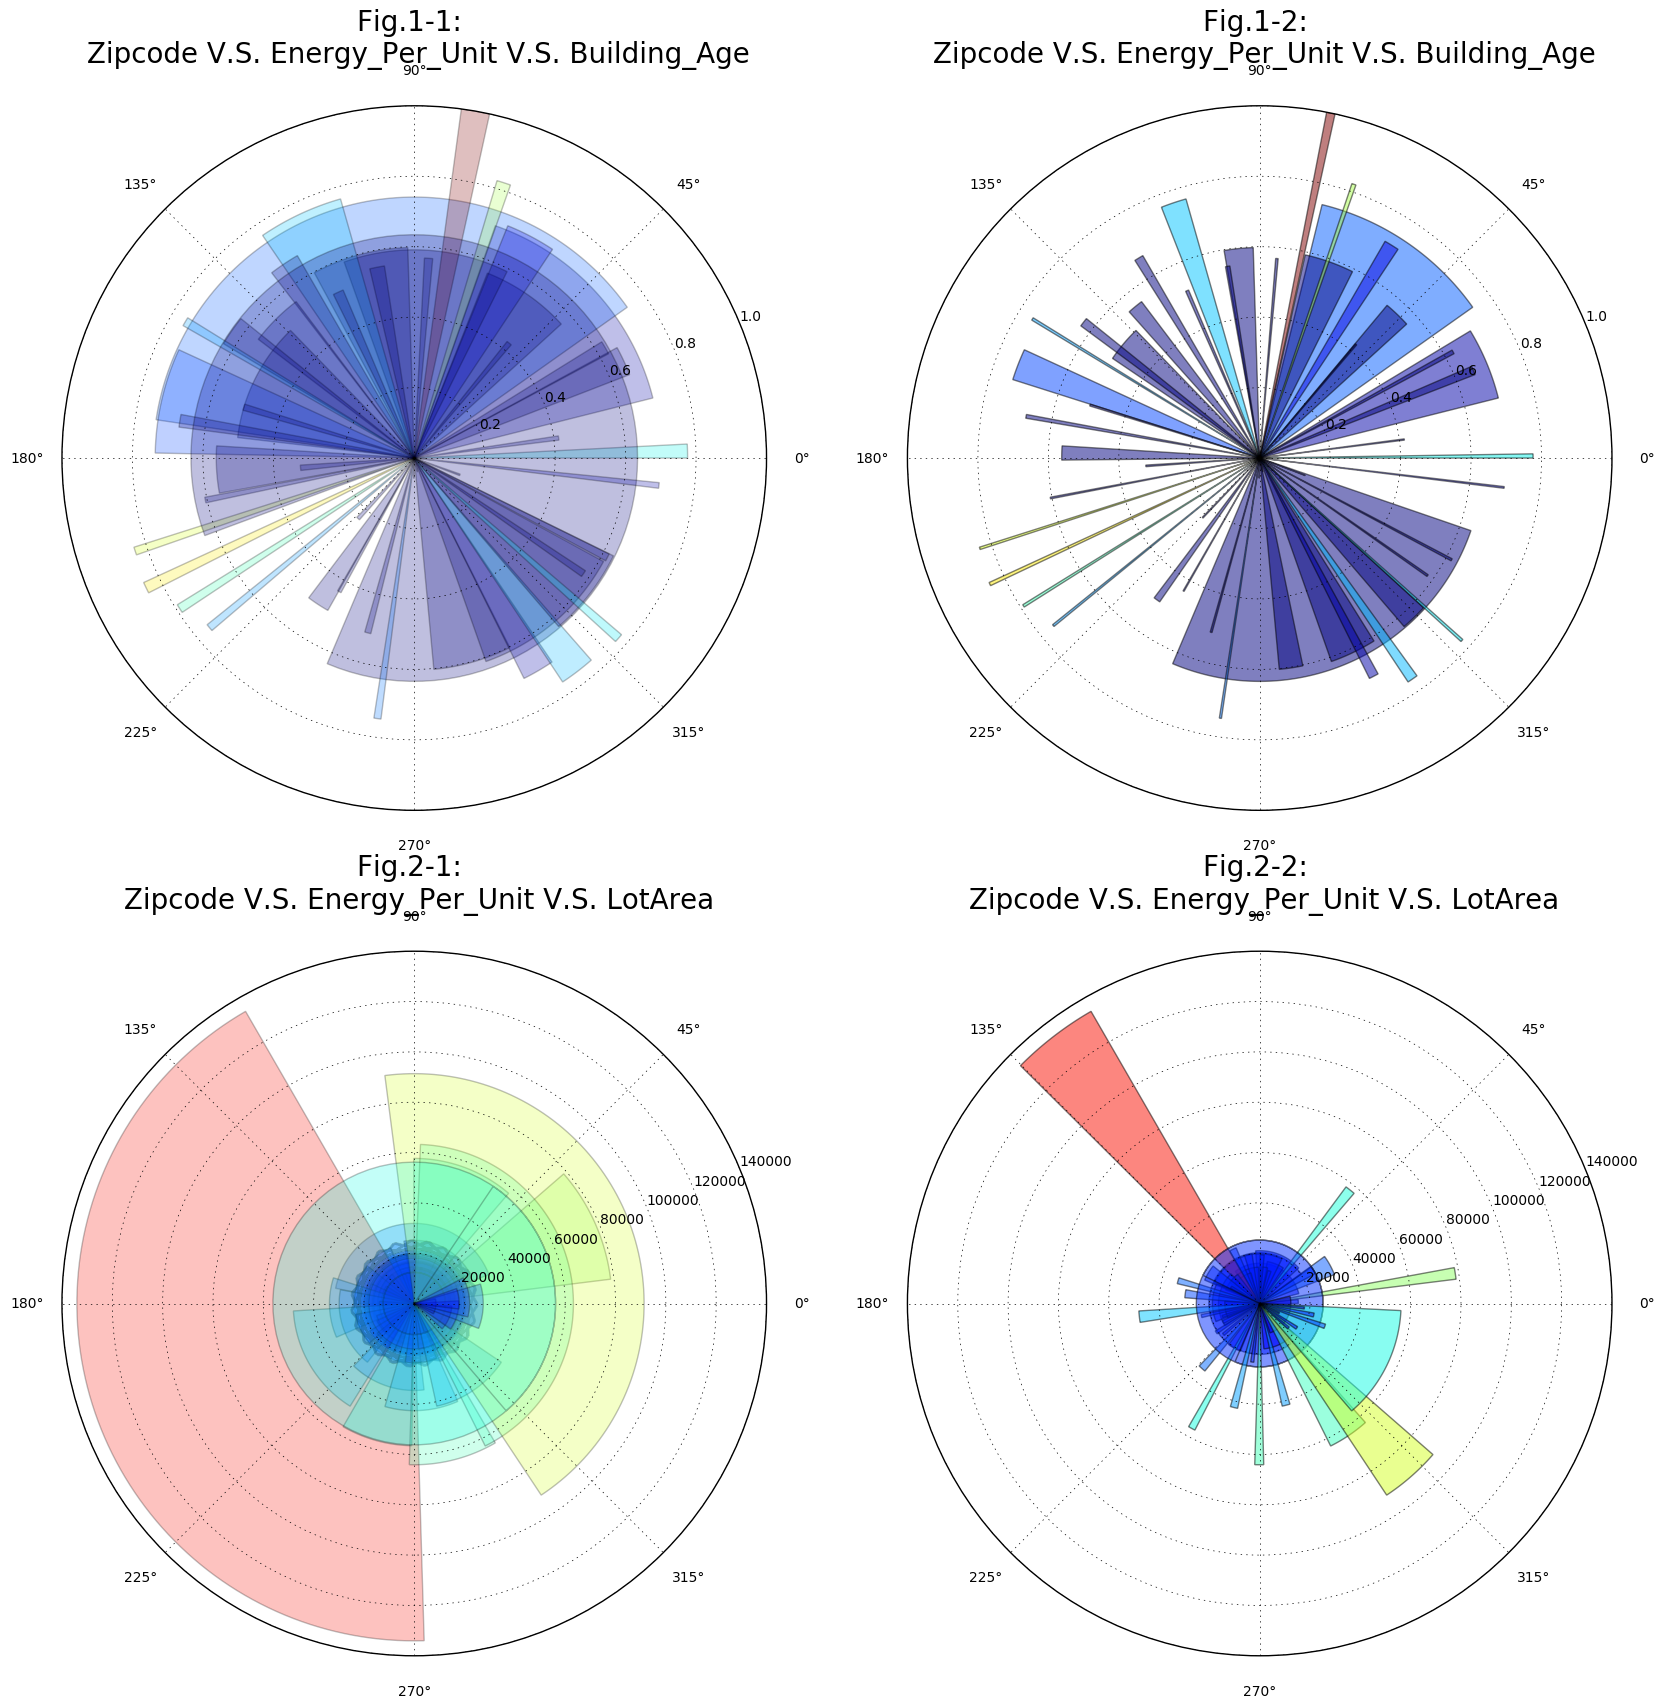

In [72]:
N = 51
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = Year 
width = np.pi / 51* EnergyUnitZip*1e-6 *5
fig = pl.figure(figsize=(20,20))
ax1 = pl.subplot(221, projection='polar')
bars = ax1.bar(theta, radii, width=width, bottom=0.0) 
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet((r-0.69)/0.236))
    bar.set_alpha(0.25)
pl.title("Fig.1-1: \n Zipcode V.S. Energy_Per_Unit V.S. Building_Age",fontsize=20)

ax2 = pl.subplot(222, projection='polar')
N = 51
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = Year 
width = np.pi / 51* EnergyUnitZip*1e-6 *1.5
bars = ax2.bar(theta, radii, width=width, bottom=0.0) 
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet((r-0.69)/0.236))
    bar.set_alpha(0.5)
pl.title("Fig.1-2: \n Zipcode V.S. Energy_Per_Unit V.S. Building_Age",fontsize=20)

    
ax3 = pl.subplot(223, projection='polar')
N = 51
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = LotZipMean 
width = np.pi / 51* EnergyUnitZip*1e-4
bars = ax3.bar(theta, radii, width=width, bottom=0.0) 
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/1e5/1.5))
    bar.set_alpha(0.25)
pl.title("Fig.2-1: \n Zipcode V.S. Energy_Per_Unit V.S. LotArea",fontsize=20)
    
ax4 = pl.subplot(224, projection='polar')
N = 51
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = LotZipMean 
width = np.pi / 51* EnergyUnitZip*1e-5
bars = ax4.bar(theta, radii, width=width, bottom=0.0) 
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/1e5/1.5))
    bar.set_alpha(0.5)
pl.title("Fig.2-2: \n Zipcode V.S. Energy_Per_Unit V.S. LotArea",fontsize=20)


The degree of the circle from 0 to 360 are divided into 51 sections, represents 51 zipcode of Manhattan by ascending order. Through the zipcode map of Manhattan, we can say zones with large zipcode mainly located in Upper Manhattan, and zones with small zipcode are located in Lower Manhattan. Of course,  there are some exceptions. So we can roughly considered the counter-clockwise changes of sections in the circle as the location changes from downtown to uptown in Manhattan. 

In Both Fig.1 and Fig.2, the width of each sections show the Energy_Per_Unit value, which is calculated by energy_total/UnitsTotal (groupby zipcode). Larger value means that zipcode area has a higher averaged energy consumption.

In Fig.1, the radius and color of each section means the averaged building age in certain zipcode area.
In Fig.2, it mean the LotArea.

From Fig.1, We can draw conclusions like zones with high averaged energy consumption are mainly in upper and lower Manhattan since sections between 135 to 225 degree are not wide enough. Of course, Central Park ! 
Besides, it seems like the older the building age, the higher averaged energy consumption, because wider sections usually with longer radius. But those slim sections shows areas with a lot of historic buildings don't use much energy on average.Maybe, there's less people living in that kind of old buildings. 

<br/><br/>

In [ ]:
# bblnrgdata_cut_2['YearBuilt'][bblnrgdata_cut_2['YearBuilt']<1800]=1800

# bblnrgdata_cut_2.plot(kind='scatter',x='energy_total',y='UnitsTotal', 
#                 fontsize=10, colormap='gist_rainbow', alpha = 1, 
#                 marker='o',  figsize=(5, 5), loglog=True,  
#                 xlim=(1000,1e11), ylim=(1,1000), 
#                 c=bblnrgdata_cut_2['YearBuilt']-1900, 
#                 s=bblnrgdata_cut_2['UnitsTotal']/bblnrgdata_cut_2['UnitsRes']*10)
# pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=12)
# pl.ylabel("total number of units", fontsize=10)
# pl.xlabel("total energy consumption (kBtu)", fontsize=10)

## Q: why chi-square? why error^2!!!!!